In [3]:
import numpy as np

In [45]:
import numpy as np

class GA:
    def __init__(self):
        self.n = 30
        self.c = 0
        self.l = 10
        self.Y = 0
        self.Z = 7
        self.alpha = 1
        self.pcross = 0.3 + (0.01 * self.Y + 0.001 * self.Z)
        self.pmut = 0.003 + (0.0001 * self.Y + 0.00001 * self.Z)
        np.random.seed(seed=42)
        self.chromosomes = np.random.randint(2, size=(self.n, self.l))

    def decode(self, A):
        powers = 2 ** np.arange(self.l - 1, -1, -1)
        decimal_value = np.dot(A, powers)
        return decimal_value

    def denormalize(self, X):
        return X * self.alpha / (2 ** self.l - 1)
    
    def calculate_profit(self, chromosome):
        b = (-1) ** self.Z * (0.5 + 0.01 * self.Y)
        index = np.where(np.all(self.chromosomes == chromosome, axis=1))[0]
        others = np.delete(self.chromosomes, index, axis=0)
        sum_qk = sum([self.denormalize(self.decode(c)) for c in others])
        qi = self.denormalize(self.decode(chromosome))
        price = self.alpha - qi - b * sum_qk
        profit = price * qi - self.c * qi
        return profit

    def relative_fitness(self, chromosome):
        total_profit = sum([self.calculate_profit(c) for c in self.chromosomes])
        return self.calculate_profit(chromosome) / total_profit if total_profit != 0 else 0

    def recombination(self):
        probabilities = np.array([self.relative_fitness(c) for c in self.chromosomes])
        probabilities = probabilities / probabilities.sum()  # Normalize the probabilities
        selected_indices = np.random.choice(self.n, size=self.n, replace=True, p=probabilities)
        self.chromosomes = self.chromosomes[selected_indices]

    def crossover(self, c1, c2):
        child1, child2 = c1.copy(), c2.copy()
        if np.random.rand() < self.pcross:
            crossover_point = self.l - self.Z
            child1 = np.concatenate((c1[:crossover_point], c2[crossover_point:]), axis=0)
            child2 = np.concatenate((c2[:crossover_point], c1[crossover_point:]), axis=0)
        return child1, child2

    def mutation(self, c):
        for i in range(len(c)):
            if np.random.rand() < self.pmut:
                c[i] = 1 - c[i]
        return c

    def elicitation(self, c1, c2, c3, c4):
        pairs = [
            (self.relative_fitness(c1), c1),
            (self.relative_fitness(c2), c2),
            (self.relative_fitness(c3), c3),
            (self.relative_fitness(c4), c4)
        ]
        sorted_pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
        best_two = sorted_pairs[0][1], sorted_pairs[1][1]
        return best_two


In [46]:
# Main simulation loop
ga = GA()

industry_outputs = []  # Endüstri çıktıları
population_variance = []  # Popülasyonun varyansı

for i in range(1000):
    ga.recombination()

    population = np.random.permutation(ga.chromosomes)
    p1 = population[:len(population)//2]
    p2 = population[len(population)//2:]
    new_population = np.zeros_like(ga.chromosomes)

    for j in range(len(p1)):
        parent1 = p1[j]
        parent2 = p2[j]
        child1, child2 = ga.crossover(parent1, parent2)
        child1 = ga.mutation(child1)
        child2 = ga.mutation(child2)
        ch1, ch2 = ga.elicitation(parent1, parent2, child1, child2)
        new_population[2 * j] = ch1
        new_population[2 * j + 1] = ch2

    Qt = np.sum([ga.denormalize(ga.decode(c)) for c in ga.chromosomes])
    industry_outputs.append(Qt)
    
    q_values = [ga.denormalize(ga.decode(c)) for c in ga.chromosomes]
    variance = np.var(q_values) 
    population_variance.append(variance)

    print(f"Iteration {i+1}: ")
    print(f"Industry Outputs: {Qt}")
    print(f"Population Variance: {variance}")
    print()
    
    ga.chromosomes = new_population

Iteration 1: 
Industry Outputs: 20.18084066471163
Population Variance: 0.07796293482762755

Iteration 2: 
Industry Outputs: 25.167155425219942
Population Variance: 0.04016951274164404

Iteration 3: 
Industry Outputs: 28.379276637341157
Population Variance: 0.002608555414029511

Iteration 4: 
Industry Outputs: 28.151515151515156
Population Variance: 0.0024616284456097787

Iteration 5: 
Industry Outputs: 28.474095796676444
Population Variance: 0.001913276066777786

Iteration 6: 
Industry Outputs: 29.000000000000007
Population Variance: 0.0013628130069337147

Iteration 7: 
Industry Outputs: 28.836754643206255
Population Variance: 0.0016578188999593479

Iteration 8: 
Industry Outputs: 28.867057673509287
Population Variance: 0.001864033921234439

Iteration 9: 
Industry Outputs: 28.58846529814272
Population Variance: 0.001860036580182893

Iteration 10: 
Industry Outputs: 28.669599217986313
Population Variance: 0.0019954524804270965

Iteration 11: 
Industry Outputs: 29.30987292277615
Populati

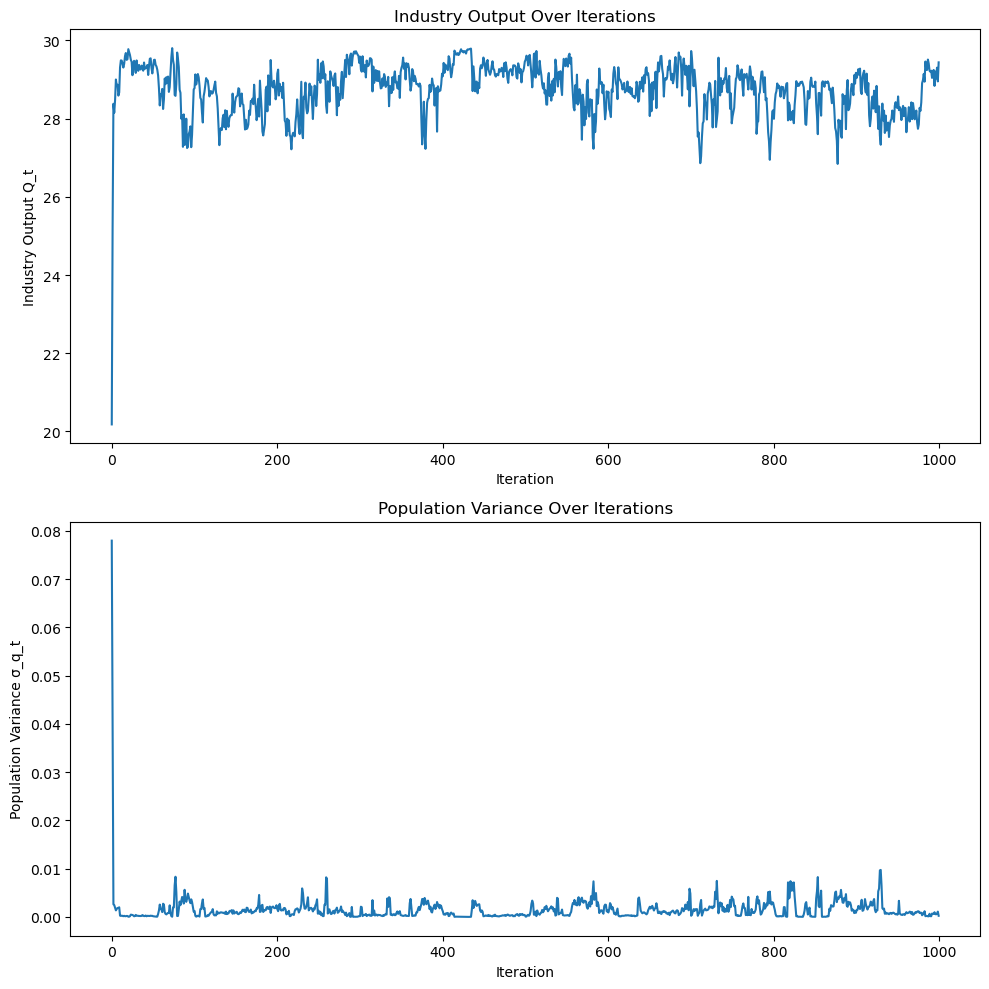

In [47]:
import matplotlib.pyplot as plt

iterations = 1000 
# Grafikleri çiz
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# İndüstri Çıktısı Grafiği
axes[0].plot(range(iterations), industry_outputs)
axes[0].set_title("Industry Output Over Iterations")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Industry Output Q_t")

# Popülasyon Varyansı Grafiği
axes[1].plot(range(iterations), population_variance)
axes[1].set_title("Population Variance Over Iterations")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Population Variance σ_q_t")

plt.tight_layout()
plt.show()

## ii

In [48]:
# Main simulation loop
ga = GA()
ga.pcross=ga.pcross+0.2

industry_outputs = []  # Endüstri çıktıları
population_variance = []  # Popülasyonun varyansı

for i in range(1000):
    ga.recombination()

    population = np.random.permutation(ga.chromosomes)
    p1 = population[:len(population)//2]
    p2 = population[len(population)//2:]
    new_population = np.zeros_like(ga.chromosomes)

    for j in range(len(p1)):
        parent1 = p1[j]
        parent2 = p2[j]
        child1, child2 = ga.crossover(parent1, parent2)
        child1 = ga.mutation(child1)
        child2 = ga.mutation(child2)
        ch1, ch2 = ga.elicitation(parent1, parent2, child1, child2)
        new_population[2 * j] = ch1
        new_population[2 * j + 1] = ch2

    Qt = np.sum([ga.denormalize(ga.decode(c)) for c in ga.chromosomes])
    industry_outputs.append(Qt)
    
    q_values = [ga.denormalize(ga.decode(c)) for c in ga.chromosomes]
    variance = np.var(q_values) 
    population_variance.append(variance)

    print(f"Iteration {i+1}: ")
    print(f"Industry Outputs: {Qt}")
    print(f"Population Variance: {variance}")
    print()
    
    ga.chromosomes = new_population

Iteration 1: 
Industry Outputs: 20.18084066471163
Population Variance: 0.07796293482762755

Iteration 2: 
Industry Outputs: 25.612903225806452
Population Variance: 0.033457623566411764

Iteration 3: 
Industry Outputs: 28.388074291300093
Population Variance: 0.004171088957454171

Iteration 4: 
Industry Outputs: 29.146627565982413
Population Variance: 0.00022431931333643523

Iteration 5: 
Industry Outputs: 29.255131964809387
Population Variance: 0.00024707708370559525

Iteration 6: 
Industry Outputs: 29.482893450635387
Population Variance: 0.0002405719818137434

Iteration 7: 
Industry Outputs: 29.17497556207234
Population Variance: 0.0002168268204278669

Iteration 8: 
Industry Outputs: 29.520039100684265
Population Variance: 0.000246114112036604

Iteration 9: 
Industry Outputs: 29.579667644183775
Population Variance: 0.00017150875789289033

Iteration 10: 
Industry Outputs: 29.652003910068423
Population Variance: 0.00020504183087350836

Iteration 11: 
Industry Outputs: 29.50733137829912
P

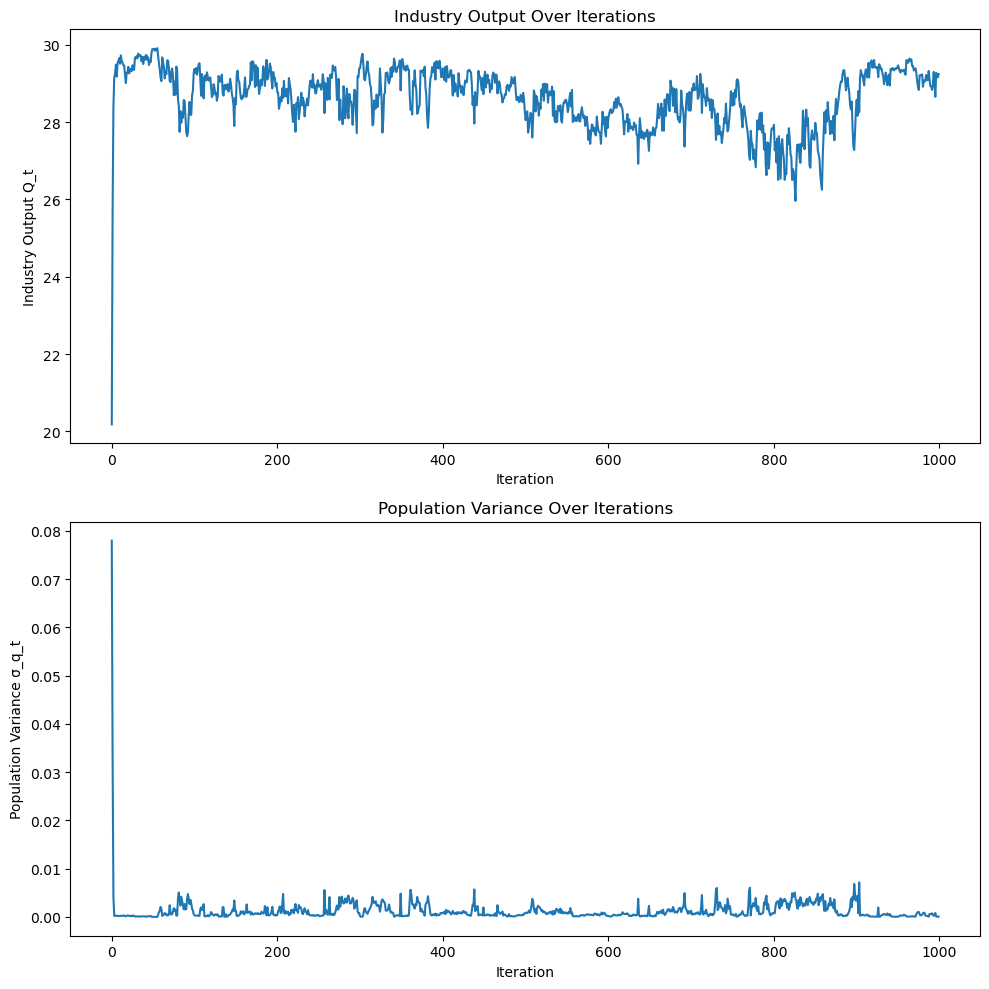

In [50]:
import matplotlib.pyplot as plt

iterations = 1000 
# Grafikleri çiz
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# İndüstri Çıktısı Grafiği
axes[0].plot(range(iterations), industry_outputs)
axes[0].set_title("Industry Output Over Iterations")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Industry Output Q_t")

# Popülasyon Varyansı Grafiği
axes[1].plot(range(iterations), population_variance)
axes[1].set_title("Population Variance Over Iterations")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Population Variance σ_q_t")

plt.tight_layout()
plt.show()

## iii

In [51]:
# Main simulation loop
ga = GA()
ga.pcross=ga.pmut+0.00200

industry_outputs = []  # Endüstri çıktıları
population_variance = []  # Popülasyonun varyansı

for i in range(1000):
    ga.recombination()

    population = np.random.permutation(ga.chromosomes)
    p1 = population[:len(population)//2]
    p2 = population[len(population)//2:]
    new_population = np.zeros_like(ga.chromosomes)

    for j in range(len(p1)):
        parent1 = p1[j]
        parent2 = p2[j]
        child1, child2 = ga.crossover(parent1, parent2)
        child1 = ga.mutation(child1)
        child2 = ga.mutation(child2)
        ch1, ch2 = ga.elicitation(parent1, parent2, child1, child2)
        new_population[2 * j] = ch1
        new_population[2 * j + 1] = ch2

    Qt = np.sum([ga.denormalize(ga.decode(c)) for c in ga.chromosomes])
    industry_outputs.append(Qt)
    
    q_values = [ga.denormalize(ga.decode(c)) for c in ga.chromosomes]
    variance = np.var(q_values) 
    population_variance.append(variance)

    print(f"Iteration {i+1}: ")
    print(f"Industry Outputs: {Qt}")
    print(f"Population Variance: {variance}")
    print()
    
    ga.chromosomes = new_population

Iteration 1: 
Industry Outputs: 20.18084066471163
Population Variance: 0.07796293482762755

Iteration 2: 
Industry Outputs: 25.18475073313783
Population Variance: 0.04126443382521332

Iteration 3: 
Industry Outputs: 27.923753665689148
Population Variance: 0.004744980788874461

Iteration 4: 
Industry Outputs: 26.7624633431085
Population Variance: 0.004342329102522082

Iteration 5: 
Industry Outputs: 27.41544477028348
Population Variance: 0.006745074007080126

Iteration 6: 
Industry Outputs: 28.46236559139784
Population Variance: 0.001981132125552396

Iteration 7: 
Industry Outputs: 29.33333333333333
Population Variance: 0.0008246265087308197

Iteration 8: 
Industry Outputs: 29.316715542521997
Population Variance: 0.0009540203854838239

Iteration 9: 
Industry Outputs: 28.97653958944282
Population Variance: 0.0011957846684930227

Iteration 10: 
Industry Outputs: 29.803519061583582
Population Variance: 0.00017143337642817373

Iteration 11: 
Industry Outputs: 29.56402737047898
Population Va

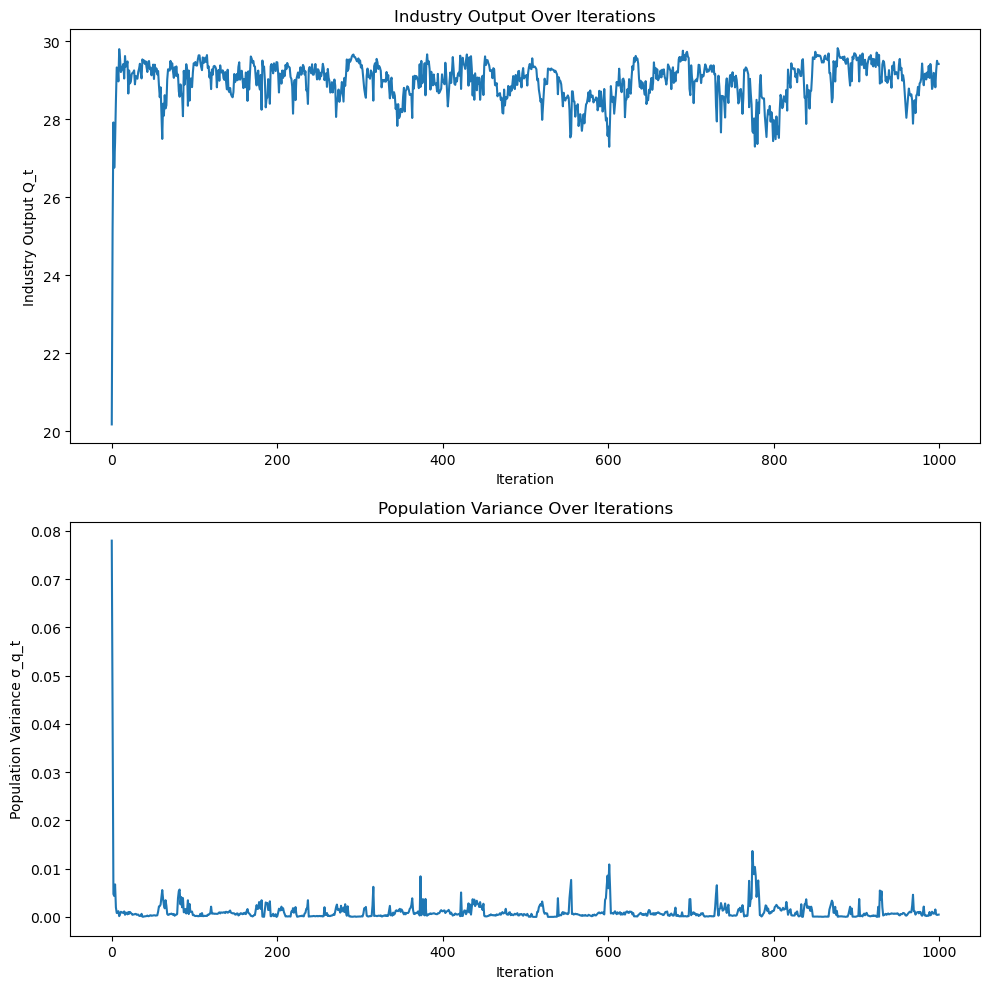

In [52]:
import matplotlib.pyplot as plt

iterations = 1000 
# Grafikleri çiz
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# İndüstri Çıktısı Grafiği
axes[0].plot(range(iterations), industry_outputs)
axes[0].set_title("Industry Output Over Iterations")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Industry Output Q_t")

# Popülasyon Varyansı Grafiği
axes[1].plot(range(iterations), population_variance)
axes[1].set_title("Population Variance Over Iterations")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Population Variance σ_q_t")

plt.tight_layout()
plt.show()

# Deneme 2

In [39]:
# Main simulation loop
ga = GA()

industry_outputs = []  # Endüstri çıktıları
population_variance = []  # Popülasyonun varyansı

for i in range(1000):
    ga.recombination()

    population = np.random.permutation(ga.chromosomes)
    p1 = population[:len(population)//2]
    p2 = population[len(population)//2:]
    new_population = np.zeros_like(ga.chromosomes)

    for j in range(len(p1)):
        parent1 = p1[j]
        parent2 = p2[j]
        child1, child2 = ga.crossover(parent1, parent2)
        child1 = ga.mutation(child1)
        child2 = ga.mutation(child2)
        ch1, ch2 = ga.elicitation(parent1, parent2, child1, child2)
        new_population[2 * j] = ch1
        new_population[2 * j + 1] = ch2

    Qt = np.sum([ga.denormalize(ga.decode(c)) for c in ga.chromosomes])
    industry_outputs.append(Qt)
    
    q_values = [ga.denormalize(ga.decode(c)) for c in ga.chromosomes]
    variance = np.var(q_values) 
    population_variance.append(variance)

    print(f"Iteration {i+1}: ")
    print(f"Industry Outputs: {Qt}")
    print(f"Population Variance: {variance}")
    print()
    
    ga.chromosomes = new_population

Iteration 1: 
Industry Outputs: 20.191593352883675
Population Variance: 0.05221895321475935

Iteration 2: 
Industry Outputs: 23.396871945259036
Population Variance: 0.016253926604571454

Iteration 3: 
Industry Outputs: 24.74486803519061
Population Variance: 0.008748182483874472

Iteration 4: 
Industry Outputs: 26.9149560117302
Population Variance: 0.0036069967164471003

Iteration 5: 
Industry Outputs: 28.037145650048878
Population Variance: 0.007493274327695544

Iteration 6: 
Industry Outputs: 28.478005865102634
Population Variance: 0.003038192603039827

Iteration 7: 
Industry Outputs: 28.48778103616813
Population Variance: 0.0019318899800090483

Iteration 8: 
Industry Outputs: 27.815249266862164
Population Variance: 0.002930050990783182

Iteration 9: 
Industry Outputs: 27.647116324535677
Population Variance: 0.004269203773192673

Iteration 10: 
Industry Outputs: 28.813294232649078
Population Variance: 0.0019559090627737554

Iteration 11: 
Industry Outputs: 28.088954056695993
Populatio

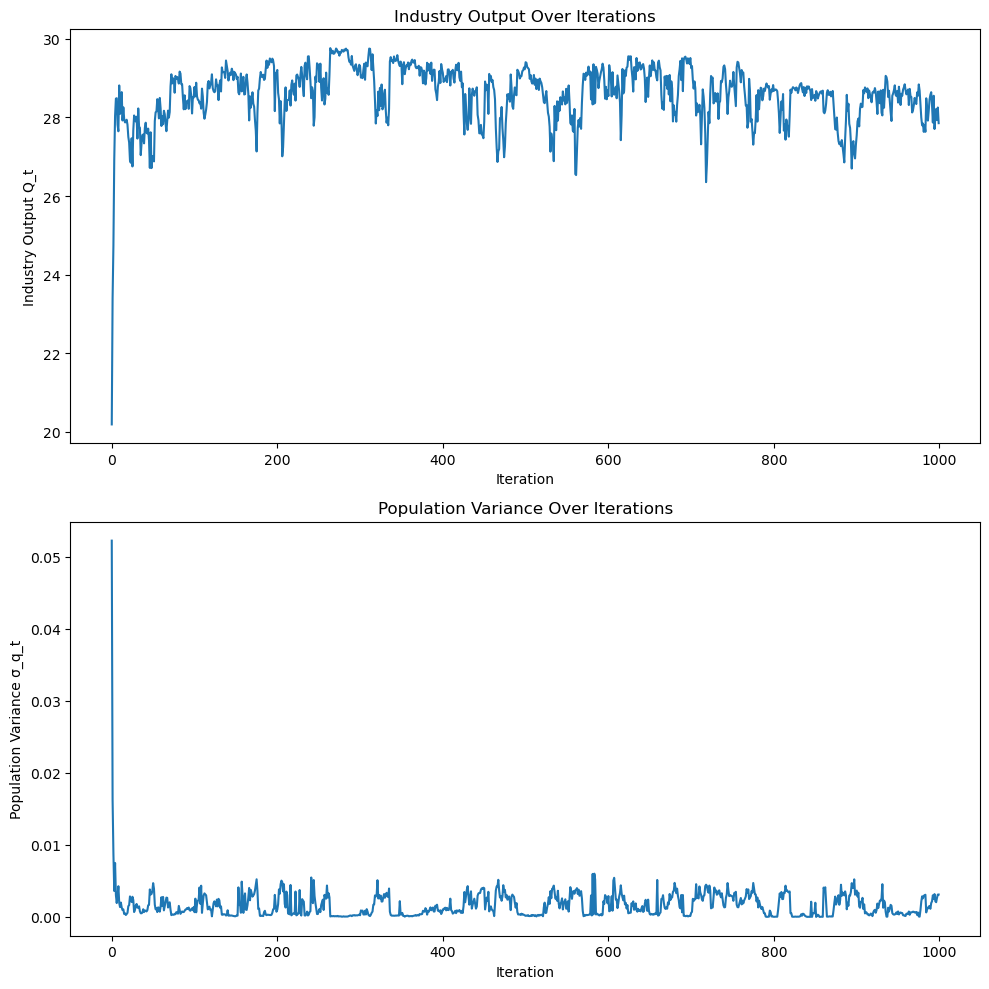

In [40]:
import matplotlib.pyplot as plt

iterations = 1000 
# Grafikleri çiz
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# İndüstri Çıktısı Grafiği
axes[0].plot(range(iterations), industry_outputs)
axes[0].set_title("Industry Output Over Iterations")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Industry Output Q_t")

# Popülasyon Varyansı Grafiği
axes[1].plot(range(iterations), population_variance)
axes[1].set_title("Population Variance Over Iterations")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Population Variance σ_q_t")

plt.tight_layout()
plt.show()

# Deneme 1

In [33]:
ga = GA()

industry_outputs = []  # Endüstri çıktıları
population_variance = []  # Popülasyonun varyansı

for i in range(1000):
    ga.recombination()

    population = np.random.permutation(ga.chromosomes)
    p1 = population[:len(population)//2]
    p2 = population[len(population)//2:]
    new_population = np.zeros_like(ga.chromosomes)

    for j in range(len(p1)):
        parent1 = p1[j]
        parent2 = p2[j]
        child1, child2 = ga.crossover(parent1, parent2)
        child1 = ga.mutation(child1)
        child2 = ga.mutation(child2)
        ch1, ch2 = ga.elicitation(parent1, parent2, child1, child2)
        new_population[2 * j] = ch1
        new_population[2 * j + 1] = ch2

    Qt = np.sum([ga.denormalize(ga.decode(c)) for c in ga.chromosomes])
    industry_outputs.append(Qt)
    
    q_values = [ga.denormalize(ga.decode(c)) for c in ga.chromosomes]
    variance = np.var(q_values) 
    population_variance.append(variance)

    print(f"Iteration {i+1}: ")
    print(f"Industry Outputs: {Qt}")
    print(f"Population Variance: {variance}")
    print()
    
    ga.chromosomes = np.array(new_population)
    

Iteration 1: 
Industry Outputs: 19.232649071358747
Population Variance: 0.07553070409154666

Iteration 2: 
Industry Outputs: 23.545454545454547
Population Variance: 0.017174446830108547

Iteration 3: 
Industry Outputs: 23.90127077223851
Population Variance: 0.015194385970723753

Iteration 4: 
Industry Outputs: 24.48289345063538
Population Variance: 0.011741591064896962

Iteration 5: 
Industry Outputs: 25.22287390029325
Population Variance: 0.009450500973535692

Iteration 6: 
Industry Outputs: 24.470185728250243
Population Variance: 0.014020231535761441

Iteration 7: 
Industry Outputs: 25.051808406647112
Population Variance: 0.013609237987883969

Iteration 8: 
Industry Outputs: 25.501466275659823
Population Variance: 0.0069896199723084584

Iteration 9: 
Industry Outputs: 25.695014662756595
Population Variance: 0.00268222540098427

Iteration 10: 
Industry Outputs: 25.724340175953078
Population Variance: 0.002386836230370428

Iteration 11: 
Industry Outputs: 25.34701857282502
Population V

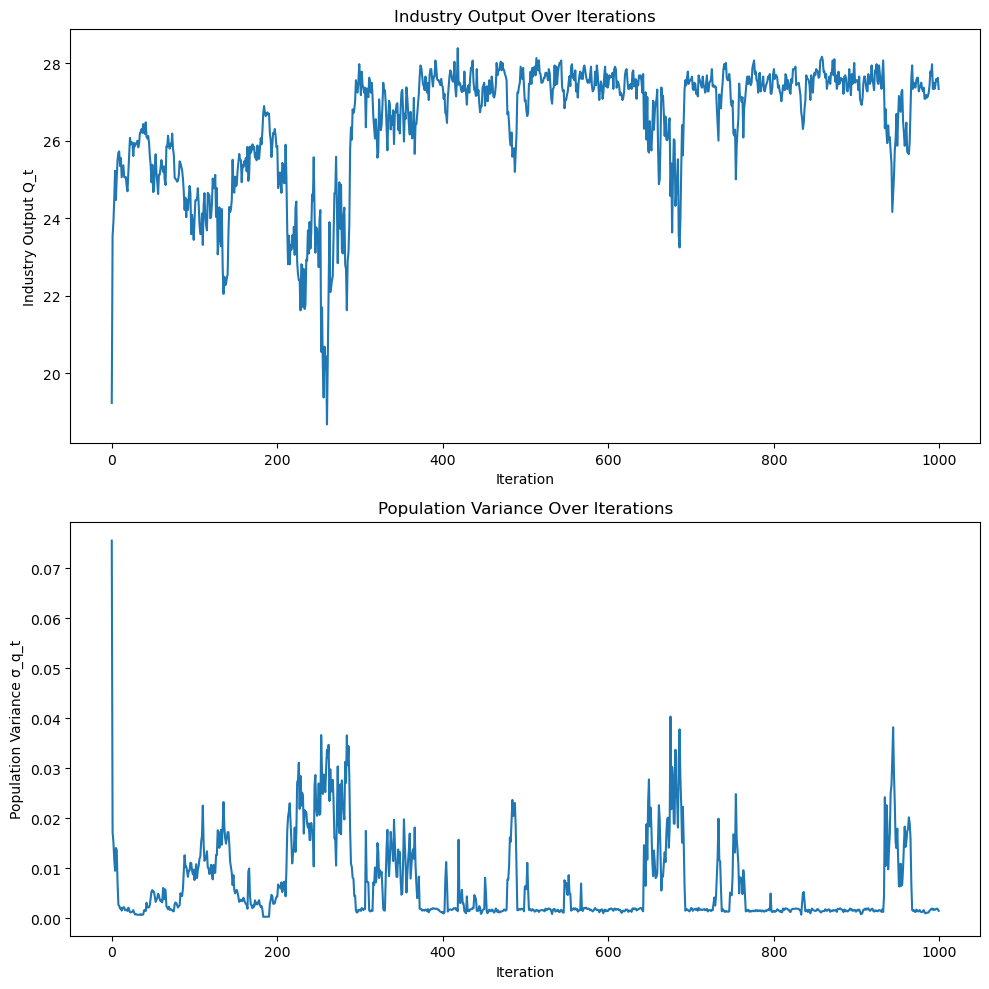

In [34]:
import matplotlib.pyplot as plt

iterations = 1000 
# Grafikleri çiz
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# İndüstri Çıktısı Grafiği
axes[0].plot(range(iterations), industry_outputs)
axes[0].set_title("Industry Output Over Iterations")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Industry Output Q_t")

# Popülasyon Varyansı Grafiği
axes[1].plot(range(iterations), population_variance)
axes[1].set_title("Population Variance Over Iterations")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Population Variance σ_q_t")

plt.tight_layout()
plt.show()